(lecture11:examples-expectation-discrete-rv)=
# Examples of expectations of discrete random variables

Let's revisit some of the distributions we encountered in [Lecture 9](lecture09) and calculate their
expectations.
We will do it both analytically, and using `scipy.stats`.

## Example: Expectation of a Bernoulli random variable

Take a [Bernoulli random variable](lecture09-bernoulli-distribution):

$$
X \sim \text{Bernoulli}(\theta).
$$

Then:

$$
\begin{split}
\mathbf{E}[X] &= \sum_x x p(x)\\
&= 0\cdot p(X=0) + 1\cdot p(X=1)\\
&= 0 \cdot (1-\theta) + 1\cdot \theta\\
&= \theta.
\end{split}
$$

And here is how we can do it using `scipy.stats`:

In [19]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [20]:
theta = 0.7
X = st.bernoulli(theta)

Now that we have made the random variable we can get its expectation by `X.expect()`:

In [21]:
print(f'E[X] = {X.expect():1.2f}')

E[X] = 0.70


Let's visualize the PMF and the expectation on the same plot:

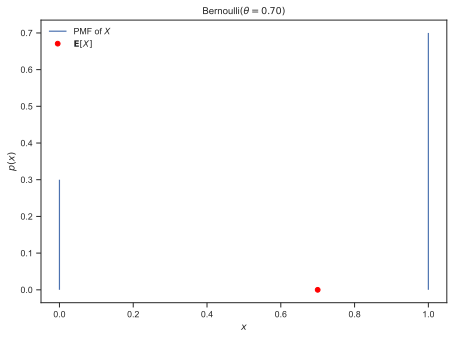

In [22]:
fig, ax = make_full_width_fig()
xs = np.arange(2)
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label=r'$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(f'Bernoulli$(\\theta={theta:1.2f})$')
plt.legend(loc='upper left')
save_for_book(fig, 'ch11.fig1')

## Example: Expectation of a Categorical random variable

Take a [Categorical random variable](lecture09:the-categorical-distribution):

$$
X \sim \text{Categorical}(0.1, 0.3, 0.4, 0.2).
$$

The expectation is:

$$
\begin{split}
\mathbf{E}[X] &= \sum_x x p(x)\\
&= 0\cdot p(X=0) + 1 \cdot p(X=1) + 2\cdot p(X=2) + 3 \cdot p(X=3)\\
&= 0 \cdot 0.1 + 1 \cdot 0.3 + 2 \cdot 0.4 + 3 \cdot 0.2\\
&= 1.7.
\end{split}
$$

Here is how we can find it with Python:

In [23]:
import numpy as np
# The values X can take
xs = np.arange(4)
print('X values: ', xs)
# The probability for each value
ps = np.array([0.1, 0.3, 0.4, 0.2])
print('X probabilities: ', ps)
# And the expectation in a single line
E_X = np.sum(xs * ps)
print(f'E[X] = {E_X:1.2f}')

X values:  [0 1 2 3]
X probabilities:  [0.1 0.3 0.4 0.2]
E[X] = 1.70


Alternatively, we could use `scipy.stats`:

In [24]:
X = st.rv_discrete(name='X', values=(xs, ps))
print(f'E[X] = {X.expect():1.2f}')

E[X] = 1.70


And a visualization:

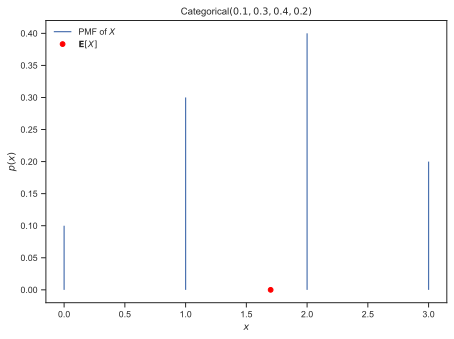

In [25]:
fig, ax = make_full_width_fig()
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label=r'$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title('Categorical$(0.1, 0.3, 0.4, 0.2)$')
plt.legend(loc='upper left')
save_for_book(fig, 'ch11.fig2')

## Example: Expectation of a Binomial random variable

Take a [Binomial random variable](lecture09:the-binomial-distribution):

$$
X\sim \text{Binomial}(n, \theta).
$$

The expectation is:

$$
\mathbf{E}[X] = n\theta.
$$

This makes sense.
Remember that $X$ is the number of successes in a binary experiment that is repeated $n$ times.
Each binary experiment has probability of success equal to $\theta$.

Here is how we can get it with `scipy.stats`:

In [26]:
n = 5       
theta = 0.6
X = st.binom(n, theta)
print(f'E[X] = {X.expect():1.2f}')
print(f'Compare to n * theta = {n * theta:1.2f}')

E[X] = 3.00
Compare to n * theta = 3.00


Just like before, let's visualize the PMF and the expectation:

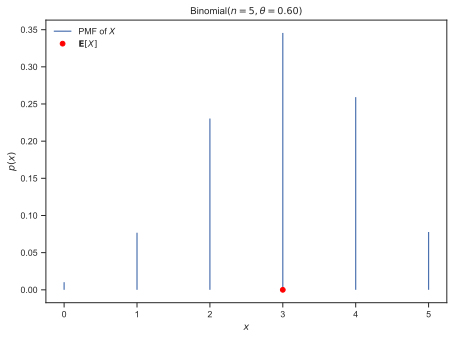

In [27]:
fig, ax = make_full_width_fig()
xs = np.arange(n+1)
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label=r'$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(f'Binomial$(n={n:d}, \\theta={theta:1.2f})$')
plt.legend(loc='upper left')
save_for_book(fig, 'ch11.fig3')

### Questions

+ Rerun the case of the Binomial with $n=50$. Does the shape of the PMF you get look familiar?

## Example: Expectation of a Poisson random variable

Take [Poisson random variable](lecture09:the-poisson-distribution):

$$
X\sim \operatorname{Poisson}(\lambda).
$$

The expectation is:

$$
\begin{split}
\mathbf{E}[X] &= \sum_{x=0}^\infty x p(X=x)\\
&= \sum_{x=0}^\infty x \frac{\lambda^x e^{-\lambda}}{x!}\\
&= e^{-\lambda} \sum_{x=0}^\infty x \frac{\lambda^x}{x!}\;\text{(take exponential out of the sum)}\\
&= e^{-\lambda} \sum_{x=1}^\infty x \frac{\lambda^x}{x!}\;\text{(the zero term does not contribute to the sum)}\\
&= e^{-\lambda} \sum_{x=1}^\infty \frac{\lambda^x}{(x-1)!}\;\text{(cancel out terms)}\\
&= e^{-\lambda} \lambda \sum_{x=1}^\infty \frac{\lambda^{x-1}}{(x-1)!}\;\text{(take one $\lambda$ out of the sum)}\\
&= e^{-\lambda} \lambda \sum_{y=0}^\infty \frac{\lambda^y}{y!}\;\text{(rename the index)}\\
&= e^{-\lambda} \lambda e^{\lambda}\;\text{(use exponential identity)}\\
&= \lambda.
\end{split}
$$

Let's also do it in `scipy.stats`:

In [28]:
lam = 2.0
X = st.poisson(lam)
print(f'E[X] = {X.expect():1.2f}')

E[X] = 2.00


And let's visualize the PMF and the expectation together:

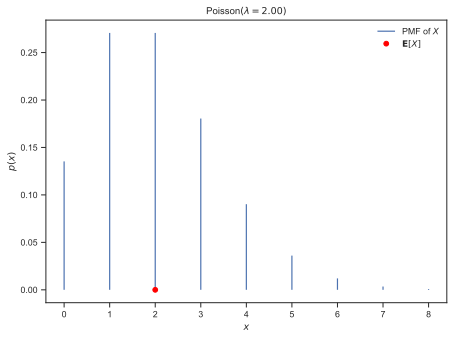

In [29]:
fig, ax = make_full_width_fig()
xs = np.arange(X.ppf(0.9999)) # I will explain this later
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
ax.plot(X.expect(), 0, 'ro', label=r'$\mathbf{E}[X]$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(f'Poisson$(\\lambda={lam:1.2f})$')
plt.legend(loc='upper right')
save_for_book(fig, 'ch11.fig4')

### Question

+ Rerun the case for the Poisson with a rate parameter $\lambda = 50$. Does the shape look familiar?